I - Analyses préliminaires : 

=== 1. Import des librairies ===

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls
import seaborn as sns
from calendar import month_abbr
from calendar import day_abbr
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

=== 2. Lecture du fichier ===

In [2]:
data_path = "data/hourly_data.csv"
df = pd.read_csv(data_path)

=== 3. Aperçu général ===

In [3]:
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

display(df.head())

Nombre de lignes : 226320
Nombre de colonnes : 36


,time,temperature_2m,relative_humidity_2m,apparent_temperature,dew_point_2m,precipitation,rain,snowfall,snow_depth,wind_speed_100m,...,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,wet_bulb_temperature_2m,boundary_layer_height,total_column_integrated_water_vapour,is_day,sunshine_duration
0,2000-01-01 00:00:00,6.0,97,4.0,5.5,0.0,0.0,0.0,0.01,14.0,...,10.8,0.414,0.419,0.417,0.359,5.6,115.0,15.6,0,0.0
1,2000-01-01 01:00:00,6.0,96,3.8,5.4,0.0,0.0,0.0,0.01,14.9,...,10.8,0.414,0.419,0.417,0.359,5.5,100.0,16.5,0,0.0
2,2000-01-01 02:00:00,5.9,96,3.8,5.3,0.0,0.0,0.0,0.01,14.7,...,10.8,0.414,0.418,0.417,0.359,5.4,105.0,16.7,0,0.0
3,2000-01-01 03:00:00,6.0,96,3.8,5.3,0.0,0.0,0.0,0.01,14.6,...,10.8,0.414,0.418,0.417,0.359,5.5,110.0,16.9,0,0.0
4,2000-01-01 04:00:00,6.1,96,3.9,5.5,0.0,0.0,0.0,0.01,15.5,...,10.7,0.413,0.418,0.417,0.359,5.6,130.0,17.3,0,0.0


=== 4. Infos générales ===

In [4]:
print("\n=== Informations générales sur le dataset ===")
df.info()


=== Informations générales sur le dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226320 entries, 0 to 226319
Data columns (total 36 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   time                                  226320 non-null  object 
 1   temperature_2m                        226320 non-null  float64
 2   relative_humidity_2m                  226320 non-null  int64  
 3   apparent_temperature                  226320 non-null  float64
 4   dew_point_2m                          226320 non-null  float64
 5   precipitation                         226320 non-null  float64
 6   rain                                  226320 non-null  float64
 7   snowfall                              226320 non-null  float64
 8   snow_depth                            226320 non-null  float64
 9   wind_speed_100m                       226320 non-null  float64
 10  wind_speed_10m       

=== 5. Vérification des valeurs manquantes ===

In [5]:
print("\n=== Pourcentage de valeurs manquantes par colonne ===")
missing = df.isna().mean() * 100
display(missing[missing > 0].sort_values(ascending=False))


=== Pourcentage de valeurs manquantes par colonne ===


boundary_layer_height                   1.930011
total_column_integrated_water_vapour    1.930011
dtype: float64

--> 2 variables ayant des valeurs manquantes au taux de moins de 2% (taux faible)
--> 3 options : 
        - supprimer les lignes ayant des valeurs manquantes et suivre le processus
        - imputer les valeurs manquantes`: interpolation temporelle, préférable pour la modélisation 
        - voir l'importance de ces deux variables dans la modélisation et voir si c'est intéressant de les supprimer

=== 6. Localisation des valeurs manquantes et interprétations ===

In [6]:
missing_rows = df[df['boundary_layer_height'].isna() | df['total_column_integrated_water_vapour'].isna()]
print("Nombre de lignes concernées :", len(missing_rows))
display(missing_rows.head())

Nombre de lignes concernées : 4368


,time,temperature_2m,relative_humidity_2m,apparent_temperature,dew_point_2m,precipitation,rain,snowfall,snow_depth,wind_speed_100m,...,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,wet_bulb_temperature_2m,boundary_layer_height,total_column_integrated_water_vapour,is_day,sunshine_duration
210385,2024-01-01 01:00:00,7.3,76,1.8,3.3,0.0,0.0,0.0,0.0,43.9,...,12.6,0.367,0.367,0.360,0.274,4.9,NaN,NaN,0,0.0
210386,2024-01-01 02:00:00,7.3,72,1.8,2.5,0.0,0.0,0.0,0.0,42.5,...,12.6,0.367,0.368,0.361,0.274,4.6,NaN,NaN,0,0.0
210387,2024-01-01 03:00:00,7.1,73,1.7,2.5,0.0,0.0,0.0,0.0,42.4,...,12.6,0.366,0.368,0.361,0.274,4.5,NaN,NaN,0,0.0
210388,2024-01-01 04:00:00,6.9,74,1.5,2.5,0.0,0.0,0.0,0.0,41.8,...,12.6,0.366,0.367,0.361,0.274,4.4,NaN,NaN,0,0.0
210389,2024-01-01 05:00:00,6.8,75,1.5,2.6,0.0,0.0,0.0,0.0,41.3,...,12.6,0.366,0.367,0.361,0.274,4.4,NaN,NaN,0,0.0


In [7]:
# Identifier les indices des lignes où il y a des valeurs manquantes
missing_rows = df[df['boundary_layer_height'].isna() | df['total_column_integrated_water_vapour'].isna()]

print(f"➡️ Nombre total de lignes avec des valeurs manquantes : {len(missing_rows)}")
print("\nExemples de lignes concernées :")
display(missing_rows.head())

# Vérifions la période concernée (utile car les données sont temporelles)
print("\n=== Périodes où les valeurs manquent ===")
missing_periods = missing_rows[['time']].sort_values(by='time')
display(missing_periods.head(10))
display(missing_periods.tail(10))

➡️ Nombre total de lignes avec des valeurs manquantes : 4368

Exemples de lignes concernées :


,time,temperature_2m,relative_humidity_2m,apparent_temperature,dew_point_2m,precipitation,rain,snowfall,snow_depth,wind_speed_100m,...,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,wet_bulb_temperature_2m,boundary_layer_height,total_column_integrated_water_vapour,is_day,sunshine_duration
210385,2024-01-01 01:00:00,7.3,76,1.8,3.3,0.0,0.0,0.0,0.0,43.9,...,12.6,0.367,0.367,0.360,0.274,4.9,NaN,NaN,0,0.0
210386,2024-01-01 02:00:00,7.3,72,1.8,2.5,0.0,0.0,0.0,0.0,42.5,...,12.6,0.367,0.368,0.361,0.274,4.6,NaN,NaN,0,0.0
210387,2024-01-01 03:00:00,7.1,73,1.7,2.5,0.0,0.0,0.0,0.0,42.4,...,12.6,0.366,0.368,0.361,0.274,4.5,NaN,NaN,0,0.0
210388,2024-01-01 04:00:00,6.9,74,1.5,2.5,0.0,0.0,0.0,0.0,41.8,...,12.6,0.366,0.367,0.361,0.274,4.4,NaN,NaN,0,0.0
210389,2024-01-01 05:00:00,6.8,75,1.5,2.6,0.0,0.0,0.0,0.0,41.3,...,12.6,0.366,0.367,0.361,0.274,4.4,NaN,NaN,0,0.0



=== Périodes où les valeurs manquent ===


,time
210385,2024-01-01 01:00:00
210386,2024-01-01 02:00:00
210387,2024-01-01 03:00:00
210388,2024-01-01 04:00:00
210389,2024-01-01 05:00:00
210390,2024-01-01 06:00:00
210391,2024-01-01 07:00:00
210392,2024-01-01 08:00:00
210393,2024-01-01 09:00:00
210394,2024-01-01 10:00:00


,time
214743,2024-06-30 15:00:00
214744,2024-06-30 16:00:00
214745,2024-06-30 17:00:00
214746,2024-06-30 18:00:00
214747,2024-06-30 19:00:00
214748,2024-06-30 20:00:00
214749,2024-06-30 21:00:00
214750,2024-06-30 22:00:00
214751,2024-06-30 23:00:00
214752,2024-07-01 00:00:00


# vérifier si les valeurs manquantes sont regroupées dans le temps :

In [8]:
missing_times = df.loc[
    df['boundary_layer_height'].isna() | df['total_column_integrated_water_vapour'].isna(),
    'time'
]
print("Période minimale :", missing_times.min())
print("Période maximale :", missing_times.max())

# Pour voir si elles sont continues ou dispersées
missing_times = pd.to_datetime(missing_times)
missing_gaps = missing_times.diff().dt.total_seconds().dropna()

print("\nDistribution des écarts temporels entre valeurs manquantes :")
display(missing_gaps.describe())


Période minimale : 2024-01-01 01:00:00
Période maximale : 2024-07-01 00:00:00

Distribution des écarts temporels entre valeurs manquantes :


count    4367.0
mean     3600.0
std         0.0
min      3600.0
25%      3600.0
50%      3600.0
75%      3600.0
max      3600.0
Name: time, dtype: float64

--> mean=min=max=3600s=1h donc toutes les différences entre deux valeurs manquantes consécutives sont exactement 1 heure

--> Vérification manuelle : Janvier : 31 jours → 31 × 24 = 744 h / Février 2024 (année bissextile) : 29 × 24 = 696 h / Mars : 31 × 24 = 744 h / Avril : 30 × 24 = 720 h / Mai : 31 × 24 = 744 h / Juin : 30 × 24 = 720 h et on commence le 1er janvier à 01:00 donc 743 + 696 + 744 + 720 + 744 + 720 = 4367 gaps

--> Les écarts temporels entre les lignes manquantes sont exactement d’une heure, ce qui signifie que les données manquantes suivent la même fréquence horaire que le dataset 

--> Ces valeurs manquantes sont donc réparties régulièrement dans le temps mais représentent une faible proportion des observations (≈1.93%)

--> Pour conserver la cohérence temporelle et ne pas supprimer de données, il est préférable d’appliquer une interpolation temporelle. Cela permettra au modèle de prédiction de garder un signal complet et régulier sans introduire de biais

--> Par la suite, si ces colonnes ne s’avèrent pas pertinentes pour la modélisation, elles pourront être supprimées ou ignorées.

In [9]:
# === 6. Statistiques descriptives ===
print("\n=== Statistiques descriptives ===")
display(df.describe().T)


=== Statistiques descriptives ===


,count,mean,std,min,25%,50%,75%,max
temperature_2m,226320.0,12.039332,7.105220,-10.500,7.000,11.900,17.000,40.900
relative_humidity_2m,226320.0,76.621828,16.056729,15.000,66.000,80.000,90.000,100.000
apparent_temperature,226320.0,9.813151,8.465197,-15.700,3.500,9.400,15.900,41.700
dew_point_2m,226320.0,7.603514,5.543304,-18.900,3.900,8.000,11.700,23.100
precipitation,226320.0,0.081347,0.334398,0.000,0.000,0.000,0.000,15.400
rain,226320.0,0.079650,0.331957,0.000,0.000,0.000,0.000,15.400
snowfall,226320.0,0.001249,0.025228,0.000,0.000,0.000,0.000,2.170
snow_depth,226320.0,0.000890,0.006599,0.000,0.000,0.000,0.000,0.120
wind_speed_100m,226320.0,21.515333,10.003964,0.000,14.400,20.700,27.400,79.300
wind_speed_10m,226320.0,12.763204,6.440312,0.000,7.900,11.600,16.500,52.000


# === 7. Interpolation temporelle ===

In [10]:
# Conversion de la colonne 'time' en datetime
df['time'] = pd.to_datetime(df['time'])

# Mise en index temporel pour faciliter l'interpolation
df = df.set_index('time')

# Vérification du nombre de valeurs manquantes avant interpolation
print("Valeurs manquantes avant interpolation :")
print(df[['boundary_layer_height', 'total_column_integrated_water_vapour']].isna().sum())

# Interpolation temporelle pour remplir les valeurs manquantes
df['boundary_layer_height'] = df['boundary_layer_height'].interpolate(method='time')
df['total_column_integrated_water_vapour'] = df['total_column_integrated_water_vapour'].interpolate(method='time')

# Vérification après interpolation
print("\n Valeurs manquantes après interpolation :")
print(df[['boundary_layer_height', 'total_column_integrated_water_vapour']].isna().sum())


Valeurs manquantes avant interpolation :
boundary_layer_height                   4368
total_column_integrated_water_vapour    4368
dtype: int64

 Valeurs manquantes après interpolation :
boundary_layer_height                   0
total_column_integrated_water_vapour    0
dtype: int64


II - Exploration des variables : 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)
from scipy.stats import skew, kurtosis

In [12]:
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])
display(df.head())

Nombre de lignes : 226320
Nombre de colonnes : 35


,temperature_2m,relative_humidity_2m,apparent_temperature,dew_point_2m,precipitation,rain,snowfall,snow_depth,wind_speed_100m,wind_speed_10m,...,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,wet_bulb_temperature_2m,boundary_layer_height,total_column_integrated_water_vapour,is_day,sunshine_duration
time,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,6.0,97,4.0,5.5,0.0,0.0,0.0,0.01,14.0,6.4,...,10.8,0.414,0.419,0.417,0.359,5.6,115.0,15.6,0,0.0
2000-01-01 01:00:00,6.0,96,3.8,5.4,0.0,0.0,0.0,0.01,14.9,6.8,...,10.8,0.414,0.419,0.417,0.359,5.5,100.0,16.5,0,0.0
2000-01-01 02:00:00,5.9,96,3.8,5.3,0.0,0.0,0.0,0.01,14.7,6.6,...,10.8,0.414,0.418,0.417,0.359,5.4,105.0,16.7,0,0.0
2000-01-01 03:00:00,6.0,96,3.8,5.3,0.0,0.0,0.0,0.01,14.6,6.6,...,10.8,0.414,0.418,0.417,0.359,5.5,110.0,16.9,0,0.0
2000-01-01 04:00:00,6.1,96,3.9,5.5,0.0,0.0,0.0,0.01,15.5,7.4,...,10.7,0.413,0.418,0.417,0.359,5.6,130.0,17.3,0,0.0


 === 1. Statistiques descriptives générales ===

In [13]:
display(df.describe().T)

# Vérifier les colonnes avec peu de variance ou valeurs uniques
low_var_cols = [c for c in df.columns if df[c].nunique() <= 1]
print("Colonnes avec peu de variance :", low_var_cols)


,count,mean,std,min,25%,50%,75%,max
temperature_2m,226320.0,12.039332,7.105220,-10.500,7.000,11.900,17.000,40.900
relative_humidity_2m,226320.0,76.621828,16.056729,15.000,66.000,80.000,90.000,100.000
apparent_temperature,226320.0,9.813151,8.465197,-15.700,3.500,9.400,15.900,41.700
dew_point_2m,226320.0,7.603514,5.543304,-18.900,3.900,8.000,11.700,23.100
precipitation,226320.0,0.081347,0.334398,0.000,0.000,0.000,0.000,15.400
rain,226320.0,0.079650,0.331957,0.000,0.000,0.000,0.000,15.400
snowfall,226320.0,0.001249,0.025228,0.000,0.000,0.000,0.000,2.170
snow_depth,226320.0,0.000890,0.006599,0.000,0.000,0.000,0.000,0.120
wind_speed_100m,226320.0,21.515333,10.003964,0.000,14.400,20.700,27.400,79.300
wind_speed_10m,226320.0,12.763204,6.440312,0.000,7.900,11.600,16.500,52.000


Colonnes avec peu de variance : []


--> Temperature : moyenne ≈ 12°C, min -10.5°C, max 40.9°C → bonne plage de températures
--> precipitation et rain ont une majorité de 0 → rare mais avec quelques fortes valeurs (max 15.4 mm) 
--> snowfall et snow_depth sont très faibles → peu d’occurrences de neige
--> Vent : wind_speed_10m et wind_speed_100m ont des moyennes modérées mais des valeurs max importantes (52 et 79 m/s)
--> Couverture nuageuse : cloud_cover, cloud_cover_low/mid/high montrent une grande variabilité (écarts-types élevés)
--> Sol : températures et humidité du sol sont stables avec une légère diminution de la variabilité en profondeur
--> Paramètres extrêmes : boundary_layer_height et sunshine_duration ont des valeurs très dispersées (écarts-types très grands)
--> boundary_layer_height et total_column_integrated_water_vapour semblent avoir des valeurs raisonnables et sans NaN (après interpolation)
--> Toutes les colonnes ont beaucoup de valeurs différentes → aucune colonne avec peu de variance (low_var_cols = []). Ça veut dire que toutes les colonnes apportent un peu d’information, on ne va pas supprimer de colonnes juste pour manque de variance

Identifier les types de variables : 

In [14]:
df.dtypes

temperature_2m                          float64
relative_humidity_2m                      int64
apparent_temperature                    float64
dew_point_2m                            float64
precipitation                           float64
rain                                    float64
snowfall                                float64
snow_depth                              float64
wind_speed_100m                         float64
wind_speed_10m                          float64
wind_direction_10m                        int64
wind_direction_100m                       int64
wind_gusts_10m                          float64
weather_code                              int64
pressure_msl                            float64
surface_pressure                        float64
cloud_cover                               int64
cloud_cover_low                           int64
cloud_cover_mid                           int64
cloud_cover_high                          int64
et0_fao_evapotranspiration              

Pour les variables catégorielles :

In [15]:
cat_cols = [c for c in df.columns if df[c].dtype=='int64' and df[c].nunique() < 50 or df[c].dtype=='object']
for c in cat_cols:
    print(f"\nColonne : {c} --> {df[c].nunique()} valeurs uniques")
    print(df[c].value_counts().head(10))



Colonne : weather_code --> 13 valeurs uniques
weather_code
3     90148
0     46276
1     28382
2     27179
51    21398
53     6456
61     2646
55     1788
63      797
71      751
Name: count, dtype: int64

Colonne : is_day --> 2 valeurs uniques
is_day
1    115495
0    110825
Name: count, dtype: int64


Pour les variables numériques continues : 

In [16]:
num_cols = [c for c in df.select_dtypes(include=['float64', 'int64']).columns 
            if c not in cat_cols + ['temperature_2m']]  # exclure cat_cols et la cible

print(f"Nombre de variables numériques continues : {len(num_cols)}")
print("Variables :", num_cols)

Nombre de variables numériques continues : 32
Variables : ['relative_humidity_2m', 'apparent_temperature', 'dew_point_2m', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'wind_speed_100m', 'wind_speed_10m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm', 'wet_bulb_temperature_2m', 'boundary_layer_height', 'total_column_integrated_water_vapour', 'sunshine_duration']


=== Statistiques descriptives détaillées ===

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,zeros (%)
relative_humidity_2m,226320,76.621828,16.056729,15.000,66.000,80.000,90.000,100.000,-0.755208,-0.216725,0.000000
apparent_temperature,226320,9.813151,8.465197,-15.700,3.500,9.400,15.900,41.700,0.178305,-0.416286,0.275274
dew_point_2m,226320,7.603514,5.543304,-18.900,3.900,8.000,11.700,23.100,-0.392932,-0.022395,0.264228
precipitation,226320,0.081347,0.334398,0.000,0.000,0.000,0.000,15.400,9.021931,144.835489,84.915164
rain,226320,0.079650,0.331957,0.000,0.000,0.000,0.000,15.400,9.156452,148.724257,85.186903
snowfall,226320,0.001249,0.025228,0.000,0.000,0.000,0.000,2.170,32.908941,1417.405100,99.456964
snow_depth,226320,0.000890,0.006599,0.000,0.000,0.000,0.000,0.120,10.922694,142.231311,96.740898
wind_speed_100m,226320,21.515333,10.003964,0.000,14.400,20.700,27.400,79.300,0.623015,0.650506,0.003977
wind_speed_10m,226320,12.763204,6.440312,0.000,7.900,11.600,16.500,52.000,0.909039,0.923189,0.007511
wind_direction_10m,226320,189.702169,102.474392,0.000,100.000,210.000,266.000,360.000,-0.312124,-1.026051,0.000442


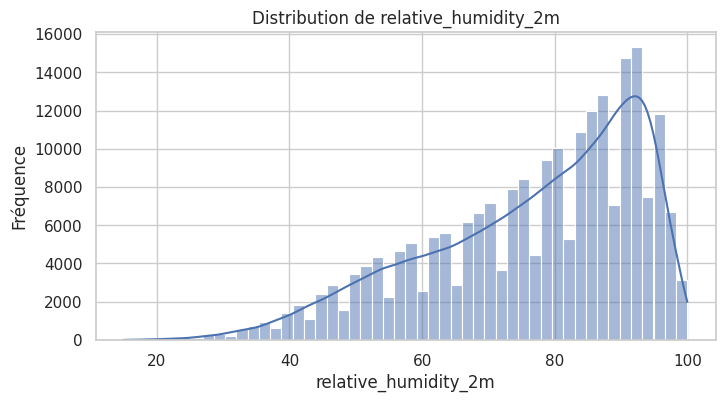

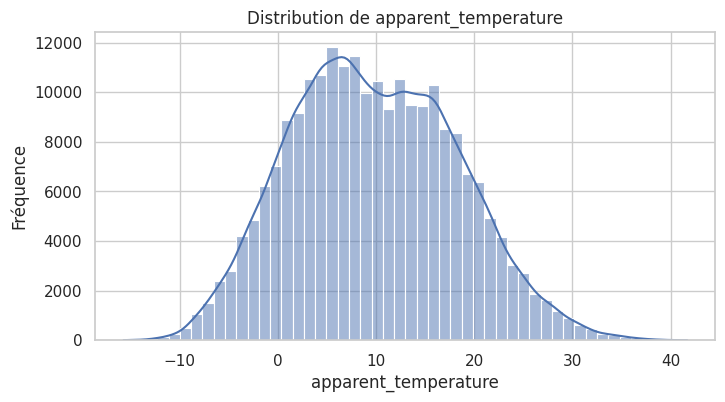

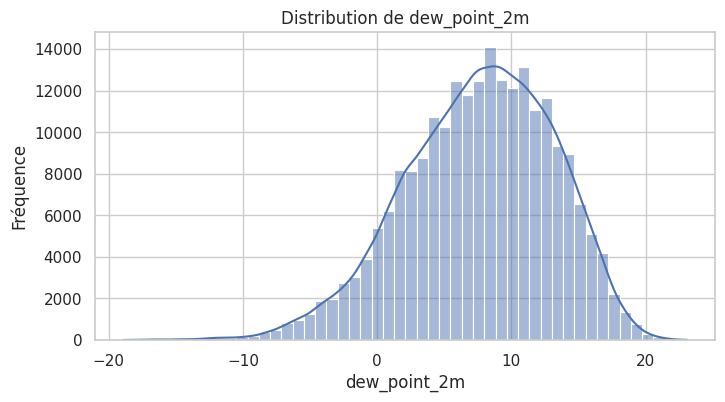

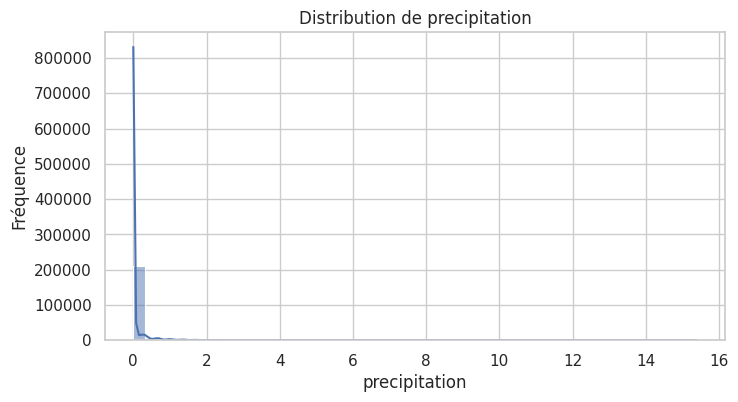

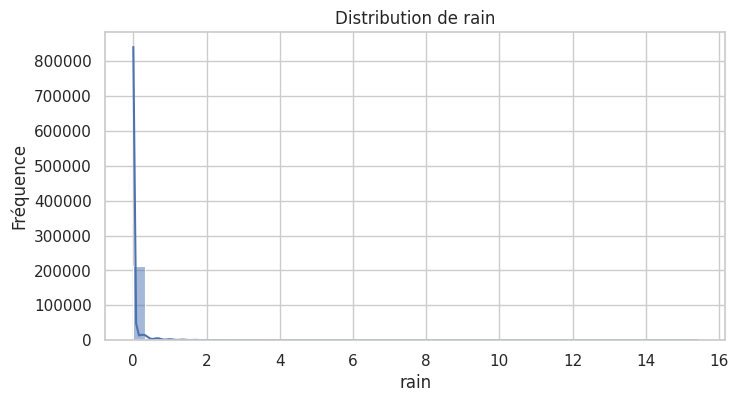

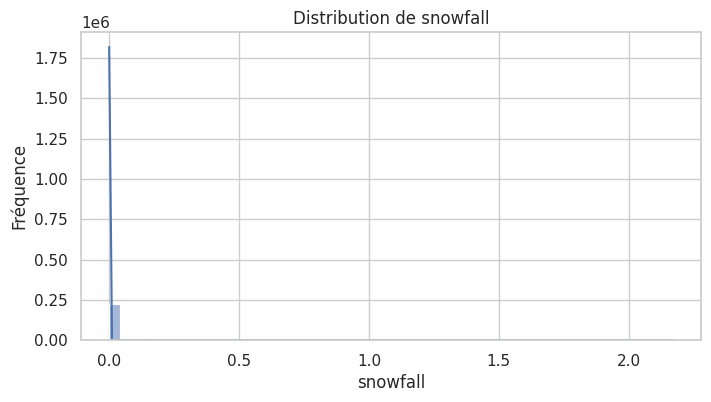

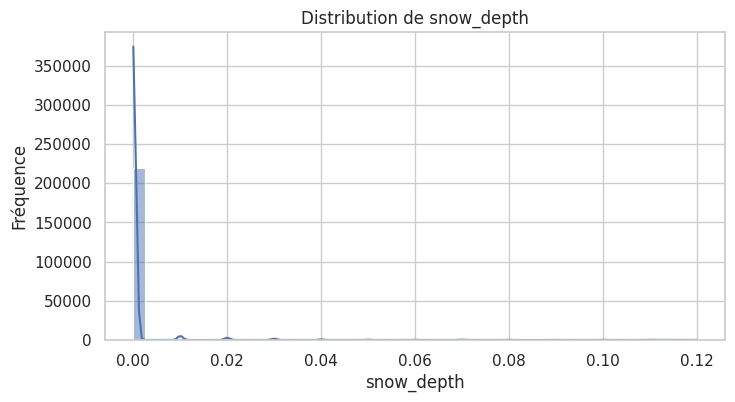

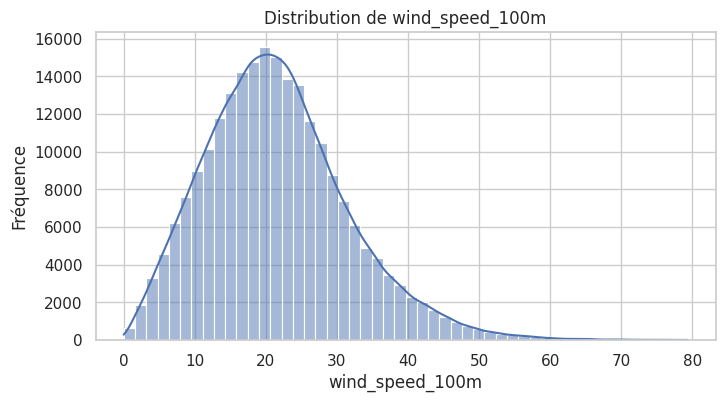

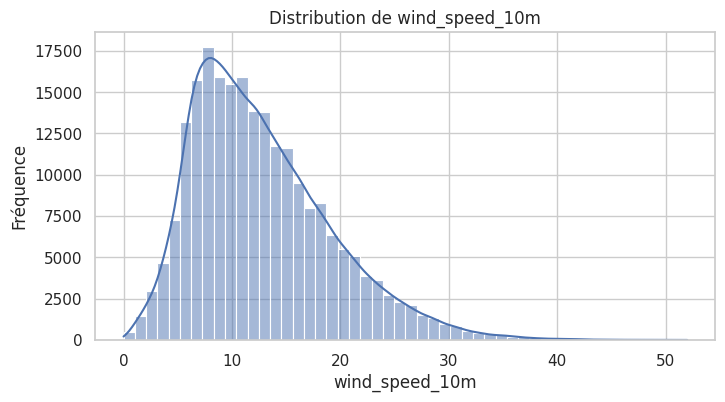

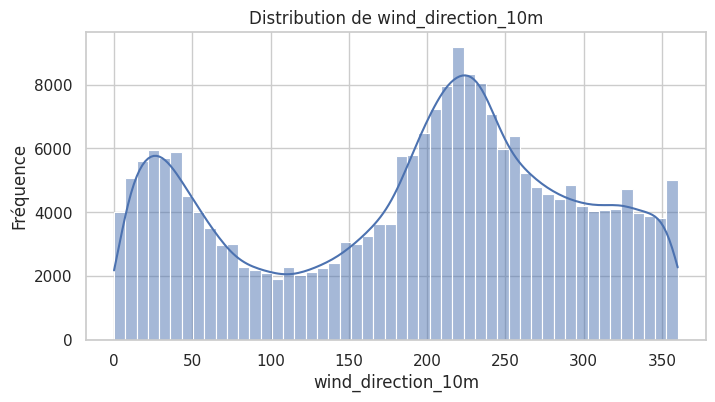

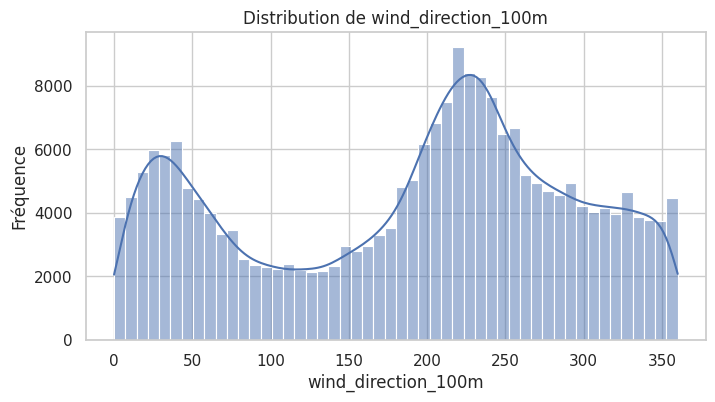

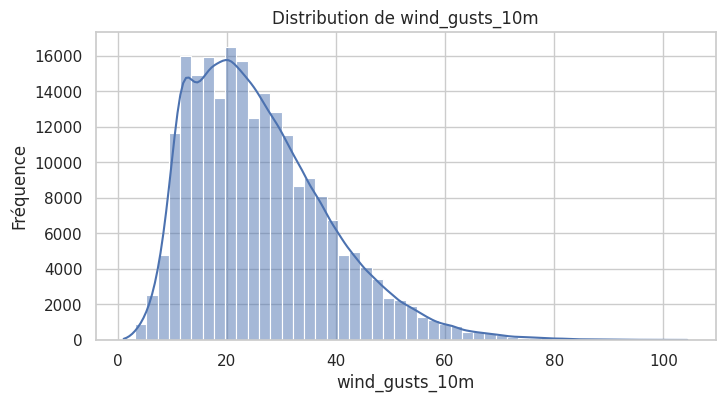

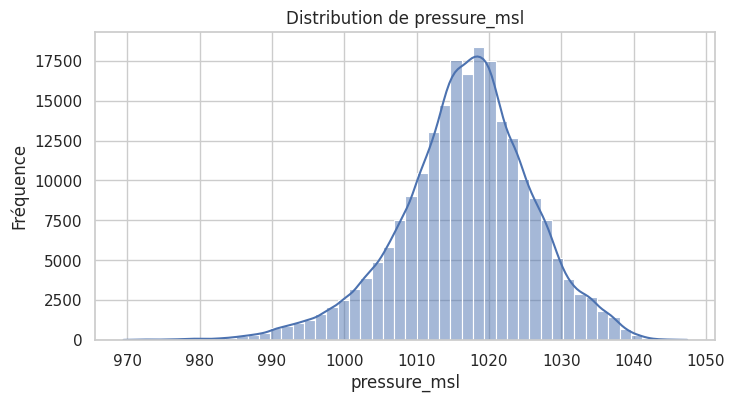

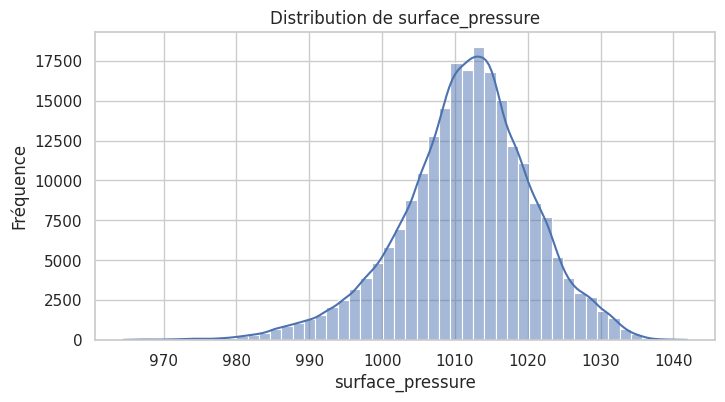

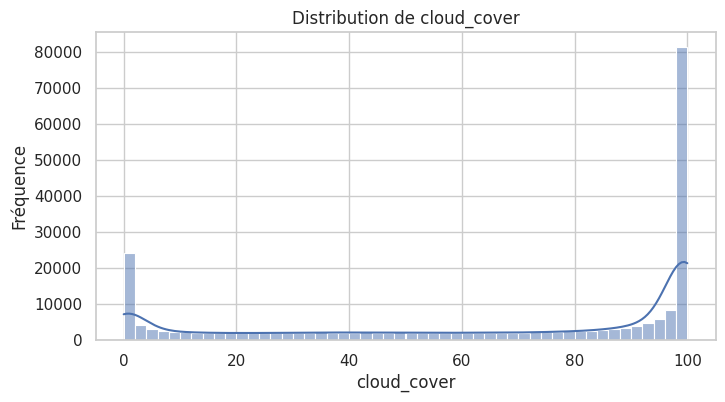

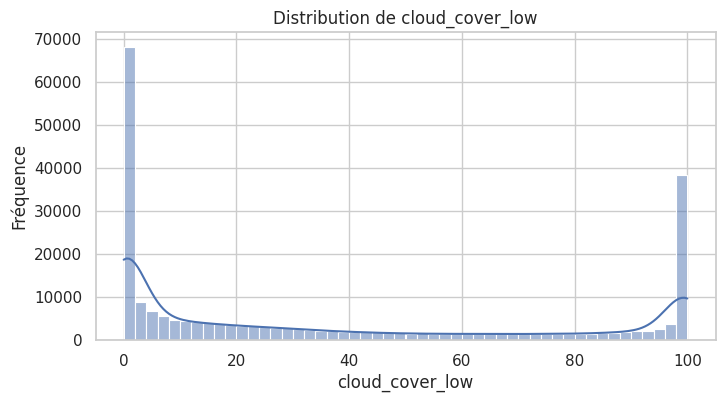

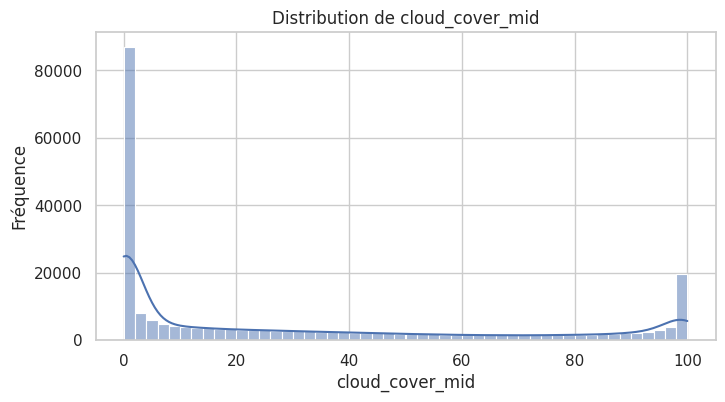

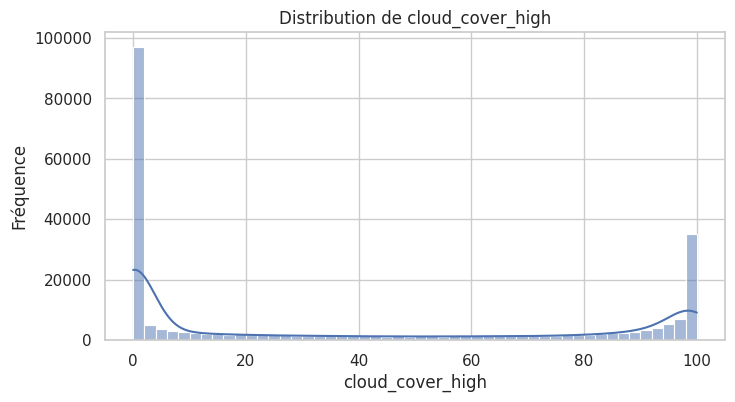

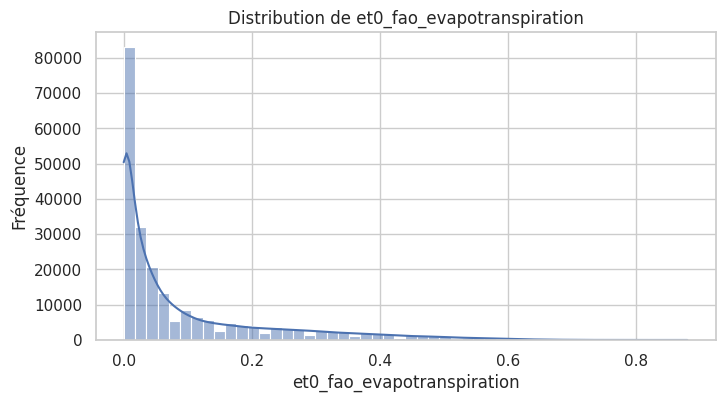

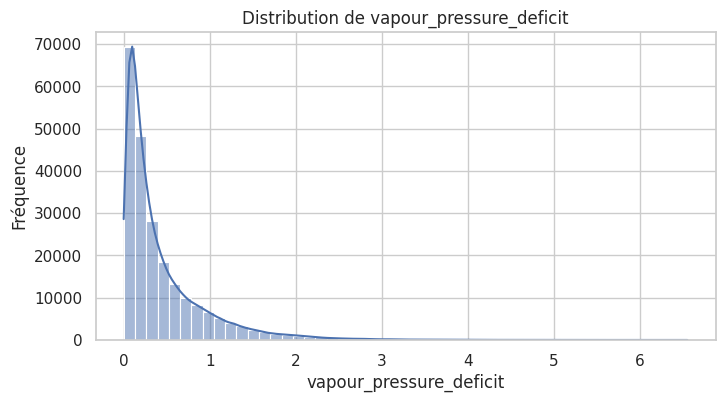

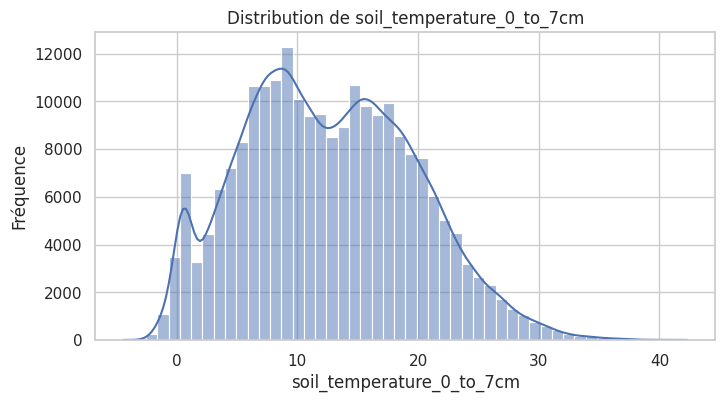

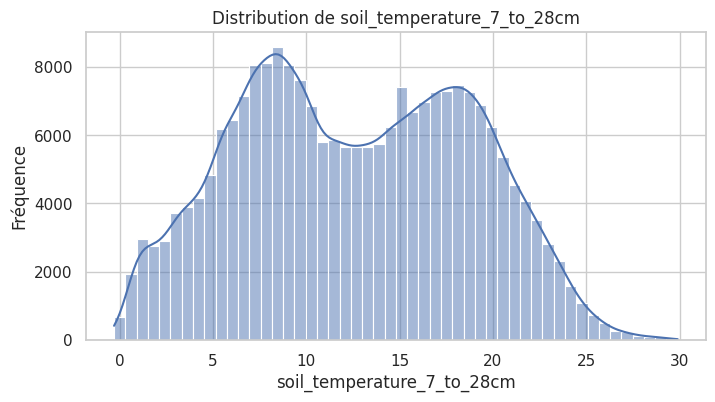

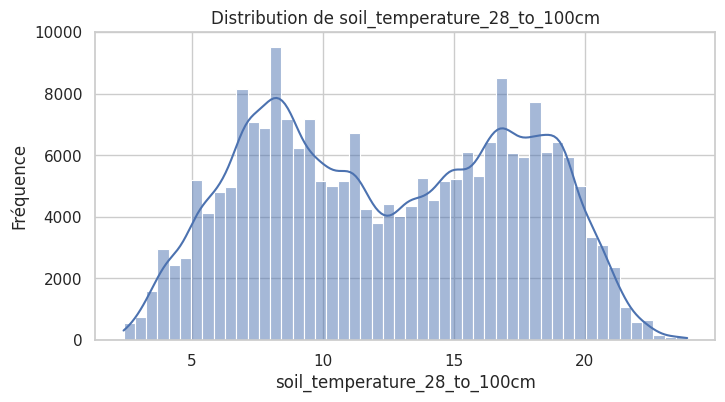

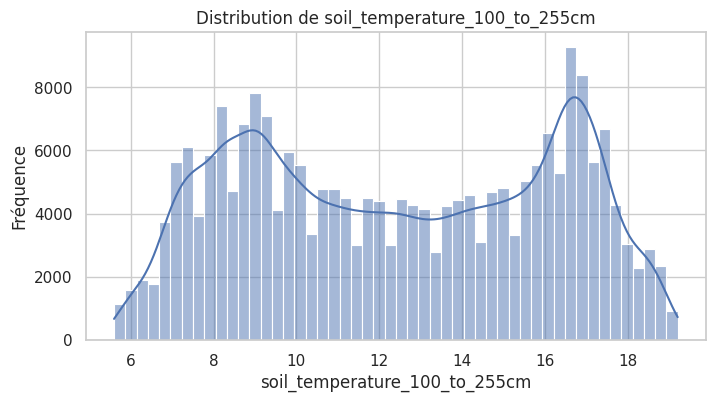

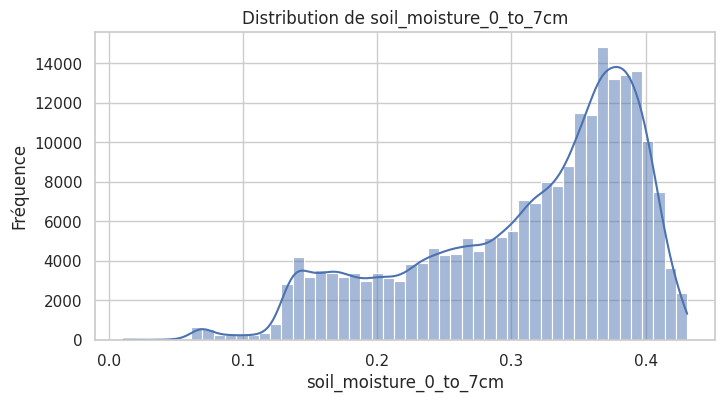

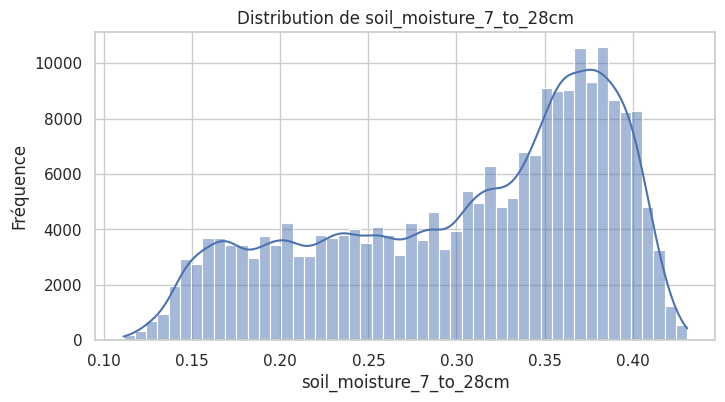

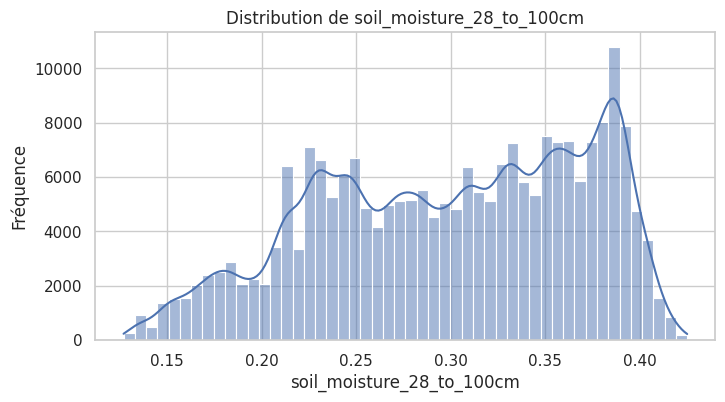

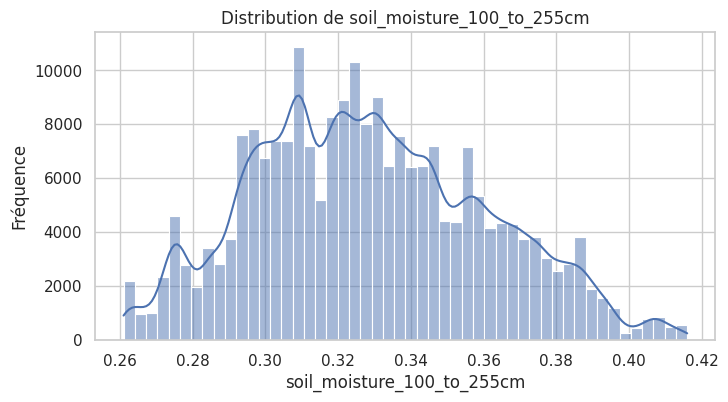

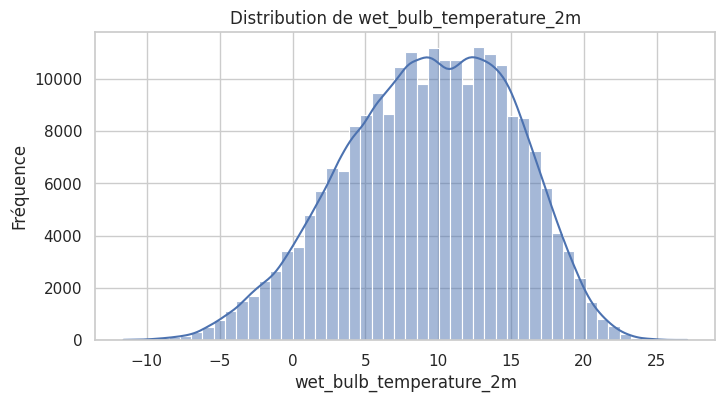

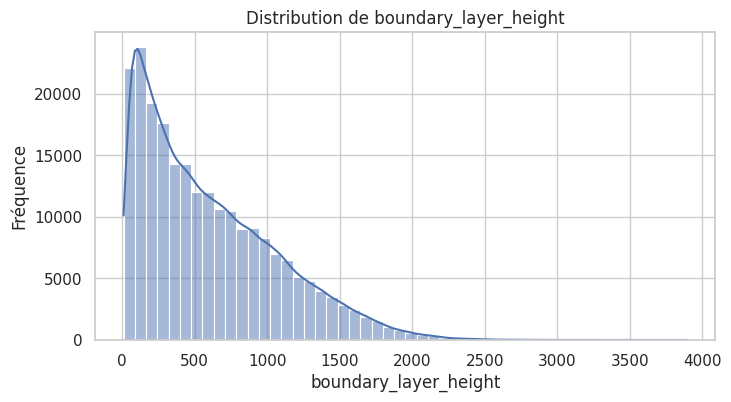

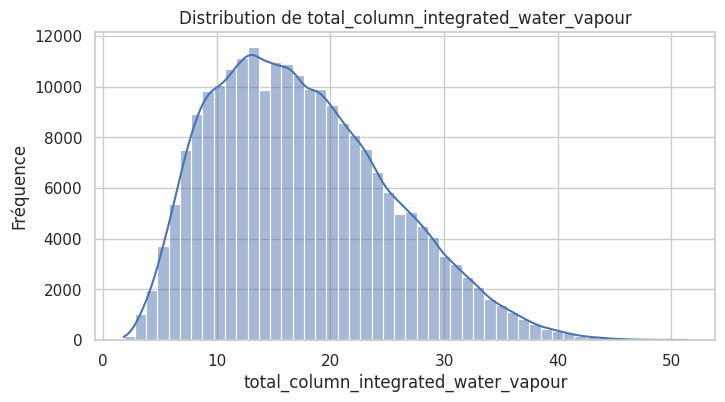

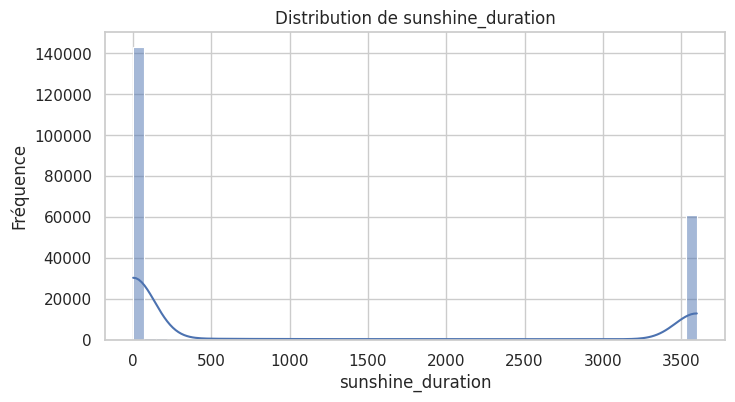

In [17]:
descriptives = pd.DataFrame(index=num_cols)

descriptives['count'] = df[num_cols].count()
descriptives['mean'] = df[num_cols].mean()
descriptives['std'] = df[num_cols].std()
descriptives['min'] = df[num_cols].min()
descriptives['25%'] = df[num_cols].quantile(0.25)
descriptives['50%'] = df[num_cols].median()
descriptives['75%'] = df[num_cols].quantile(0.75)
descriptives['max'] = df[num_cols].max()
descriptives['skew'] = df[num_cols].apply(lambda x: skew(x))
descriptives['kurtosis'] = df[num_cols].apply(lambda x: kurtosis(x))
descriptives['zeros (%)'] = df[num_cols].apply(lambda x: (x==0).sum()/len(x)*100)

display(descriptives)

# ===  Distribution des variables ===
for c in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[c], bins=50, kde=True)
    plt.title(f"Distribution de {c}")
    plt.xlabel(c)
    plt.ylabel("Fréquence")
    plt.show()

--> Humidité relative (relative_humidity_2m) : Moyenne : 76.6 %, assez élevée → il fait globalement humide / Skew négatif (-0.75) → la distribution est légèrement concentrée vers les valeurs élevées (80-100 %).
--> Températures (apparent_temperature, dew_point_2m) : Apparent temperature moyenne : ~10°C, avec des valeurs allant jusqu’à 41.7°C (valeurs extrêmes possibles en été ou journée chaude) / Skew légèrement positif pour apparent temp → quelques valeurs très chaudes.
--> Précipitations, pluie, neige : Très nombreuses valeurs nulles : 85 % pour la pluie, 99 % pour la neige / Distribution très asymétrique (skew très élevé) → la plupart des jours sont secs / Cela signifie que ces variables sont très sparsely populated, et qu’une transformation ou agrégation pourrait être nécessaire.
--> 

Distributions particulières : 
- relative_humidity_2m : Moyenne : 76.6 %, assez élevée → il fait globalement humide / Fortement Asymétrique (vers la gauche), biaisée vers les valeurs élevées --> Standardisation/Normalisation ou une transformation légère (comme une mise à l'échelle puissance) pourrait aider à gérer l'asymétrie
- wind_speed_10m : Très fortement asymétrique vers la droite --> Transformation logarithmique (log) ou racine carrée pour réduire l'asymétrie et traiter les valeurs extrêmes. Ensuite, Standardisation.
- wind_speed_100m : Similaire à wind_speed_10m, mais le mode est plus élevé --> Transformation logarithmique (log) ou racine carrée pour réduire l'asymétrie. Ensuite, Standardisation.
- rain et precipitation : Ces distributions sont dominées par un pic massif à zéro --> Créer une variable binaire "Pluie/Non-Pluie" ou "Précipitations/Non-Précipitations" OU Transformation : Appliquer un log(x+ϵ) sur les valeurs non nulles pour réduire l'asymétrie des rares événements OU Mise à l'échelle : Normalisation ou mise à l'échelle des valeurs.
- snowfall et snow_depth : Extrêmement Asymétrique (Pics à zéro) avec presque toutes les valeurs à zéro --> Variable binaire : Créer une variable binaire "Neige/Non-Neige" pour snowfall et/ou snow_depth > 0. OU Simplification : Étant donné la rareté des valeurs non nulles, ces variables pourraient être moins informatives pour la prédiction de la température future (sauf si la neige est un prédicteur de températures basses)
- wind_speed_10m et wind_speed_100m : Fortement Asymétrique (vers la droite) --> Transformation Logarithmique (log(x+1)) ou Racine Carrée pour réduire l'asymétrie et la variance des valeurs extrêmes. Puis, Standardisation.
- wind_gusts_10m : Fortement Asymétrique (vers la droite), très similaire aux vitesses de vent moyennes, mais avec des valeurs maximales plus élevées --> Transformation Logarithmique (log(x+1)) pour gérer la forte asymétrie et les valeurs extrêmes. Puis, Standardisation.
- wind_direction_10m et wind_direction_100m : Distribution bimodale claire, avec des pics autour de 30-40° (Nord-Est ou Nord) et 220-240° (Sud-Ouest) --> Encodage Cyclique (Sinus/Cosinus). Utiliser la variable brute comme numérique est incorrect (359° est très proche de 0°, mais leur différence numérique est 359), Transformer en sin(θ) et cos(θ) 
- vapour_pressure_deficit : Pic massif près de zéro, avec une longue traîne --> Transformation Logarithmique (log(x+ϵ)) ou Racine Carrée pour gérer l'asymétrie et les zéros. Puis, Standardisation.
- et0_fao_evapotranspiration : Pic massif à zéro ou très proche, avec une longue traîne --> Créer une variable binaire "ET > 0"
- sunshine_duration : Bimodale Extrême / Pics aux extrémités --> Variable Binaire 
- cloud_cover, cloud_cover_low, mid et high : Bimodales Extrêmes --> Normalisation Min-Max (si ce n'est pas déjà fait : 0−100%). Pour certains modèles, une transformation non linéaire peut aider, mais les arbres de décision/boosting gèrent bien cette forme. Une stratégie de segmentation (binaire/catégorielle) pourrait être envisagée (ex: Dégagé <10%, Partiel 10%−90%, Couvert >90%).
- vapour_pressure_deficit : Pic massif près de zéro, longue traîne --> Transformation Logarithmique (log(x+ϵ)) et Standardisation. 
- total_column_integrated_water_vapour : Asymétrique (vers la droite) --> Standardisation/Normalisation. Une légère transformation (log ou racine carrée) pourrait être envisagée pour adoucir la queue, mais la standardisation pourrait être suffisante.
- boundary_layer_height : Fortement Asymétrique (vers la droite) --> Transformation Logarithmique (log(x+1)) pour gérer la forte asymétrie et la longue traîne, puis Standardisation !! 
- soil_moisture_0_to_7cm : Distribution fortement biaisée vers les valeurs élevées --> Standardisation/Normalisation. Aucune transformation Logarithmique n'est nécessaire car elle est biaisée vers la gauche et non vers la droite
- soil_moisture_7_to_28cm, soil_moisture_28_to_100cm et soil_moisture_100_to_255cm : Les distributions sont moins biaisées que la couche superficielle et montrent plusieurs pics. L'humidité du sol en profondeur est plus stable (moins influencée par les événements immédiats), représentant l'état hydrique à long terme. --> Une simple mise à l'échelle est la meilleure approche, en laissant le modèle gérer la multimodalité.

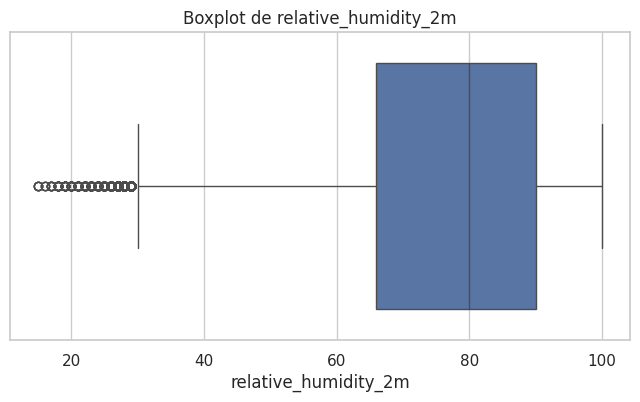

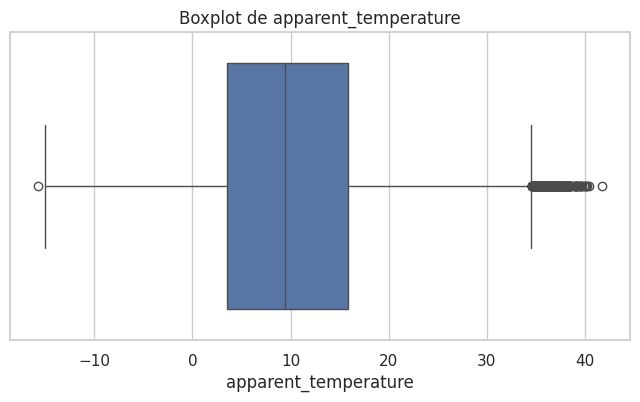

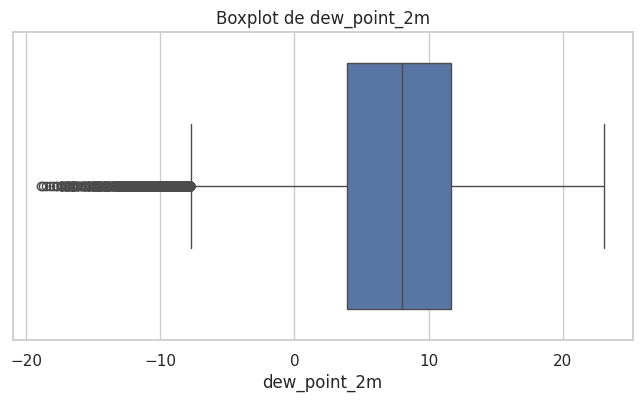

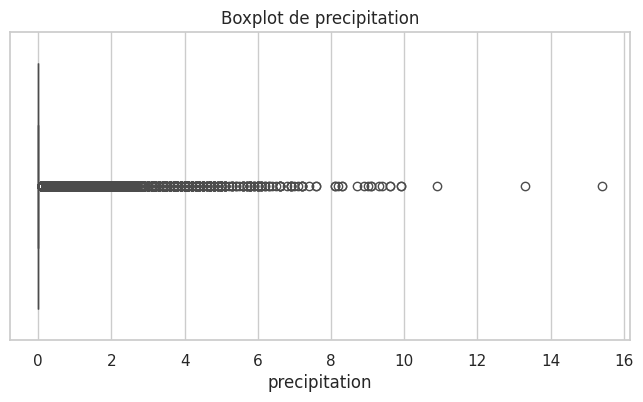

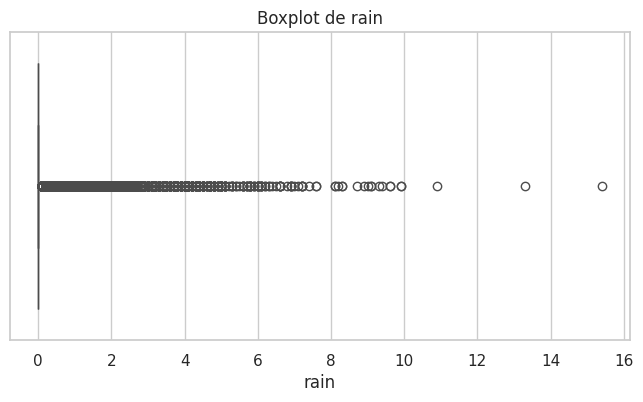

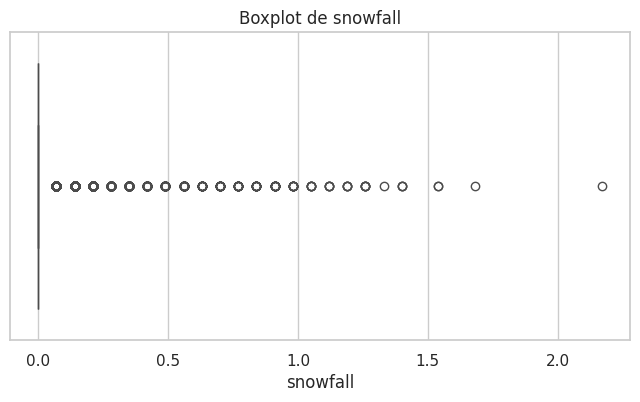

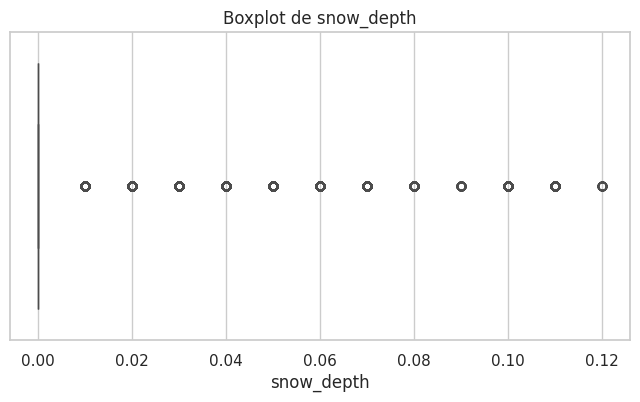

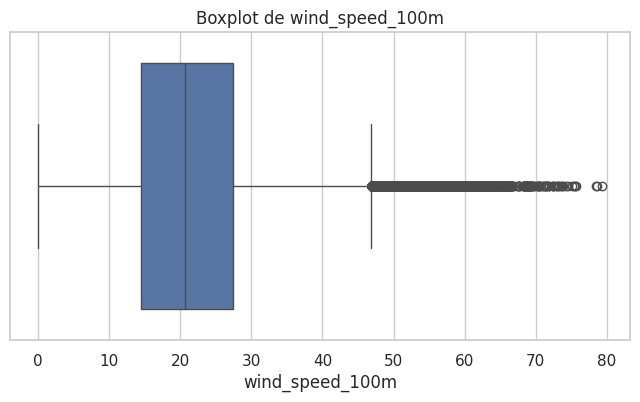

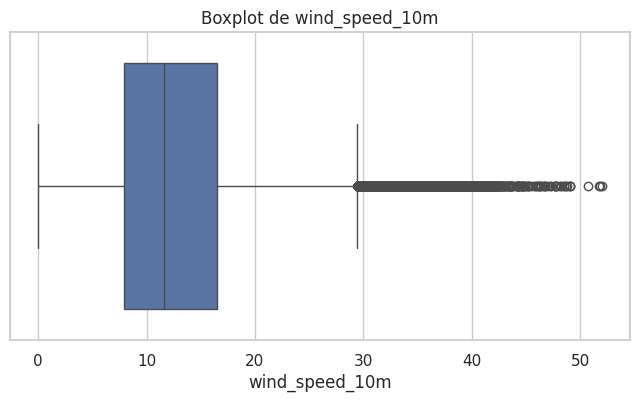

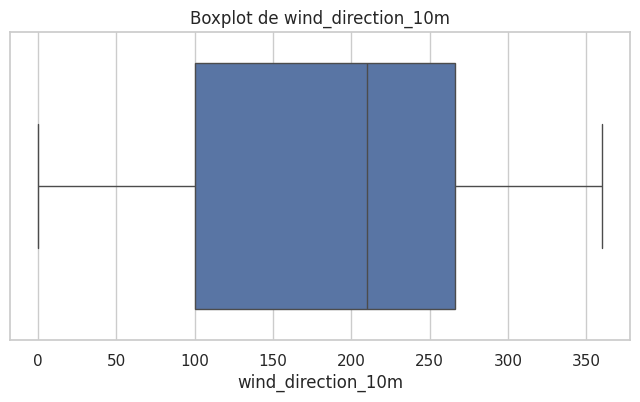

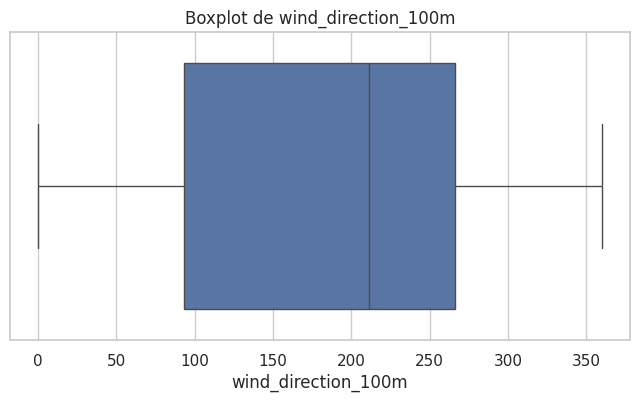

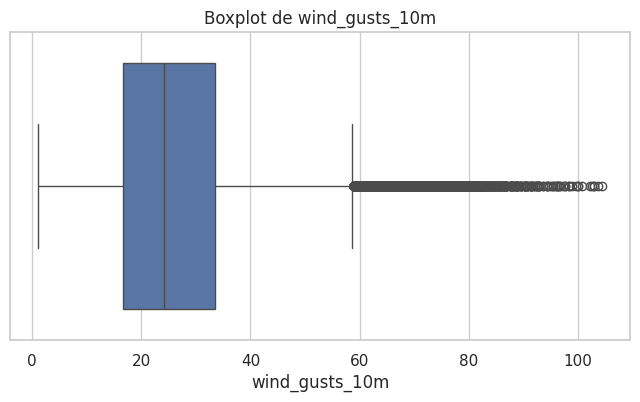

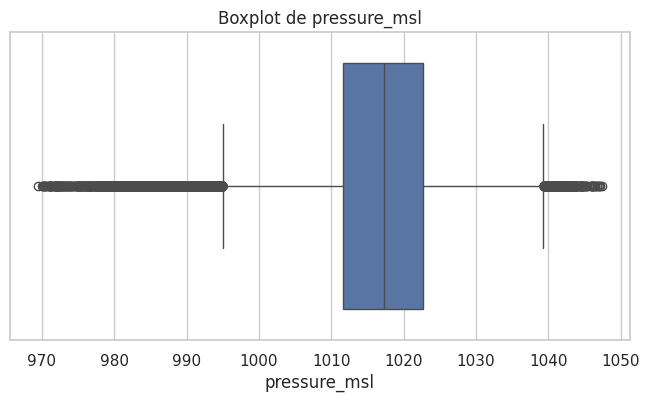

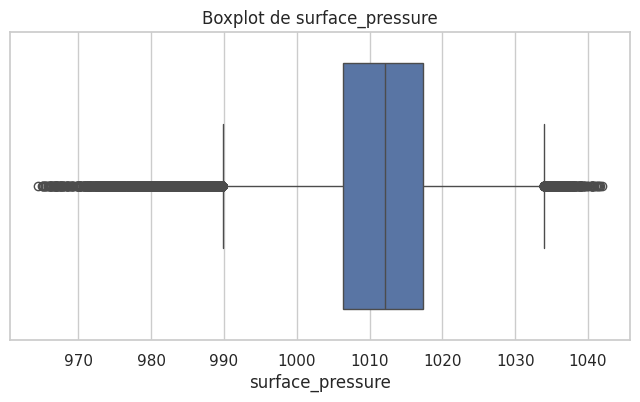

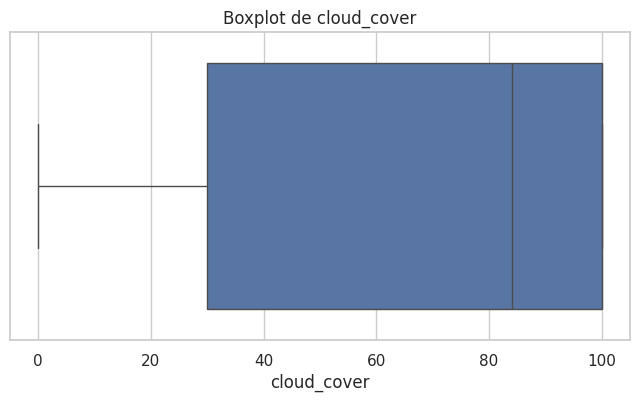

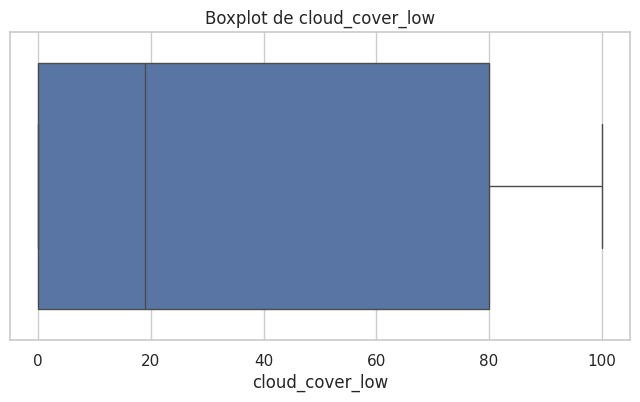

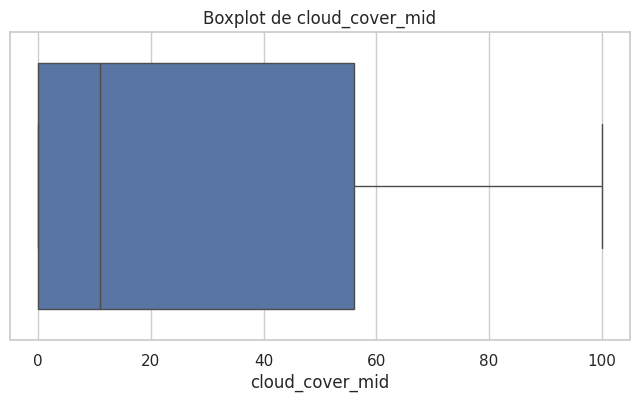

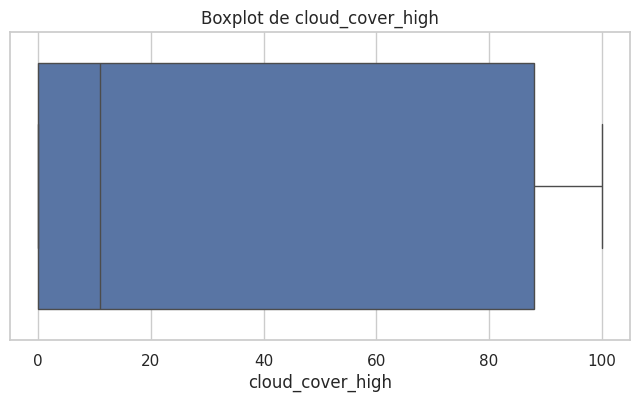

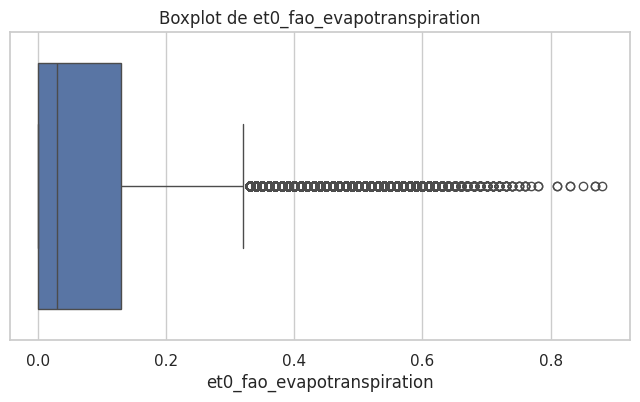

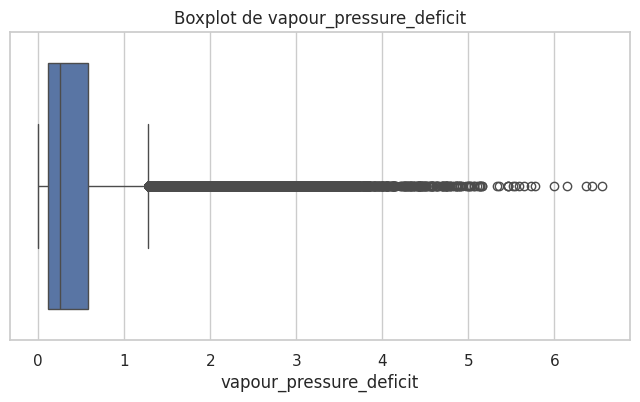

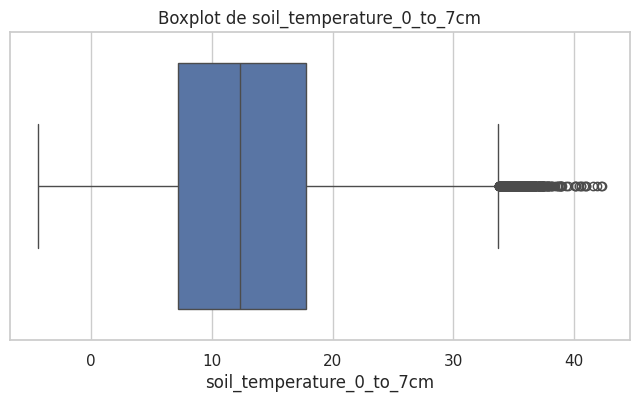

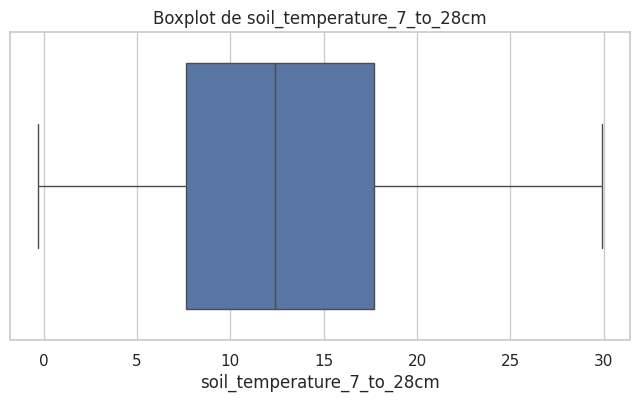

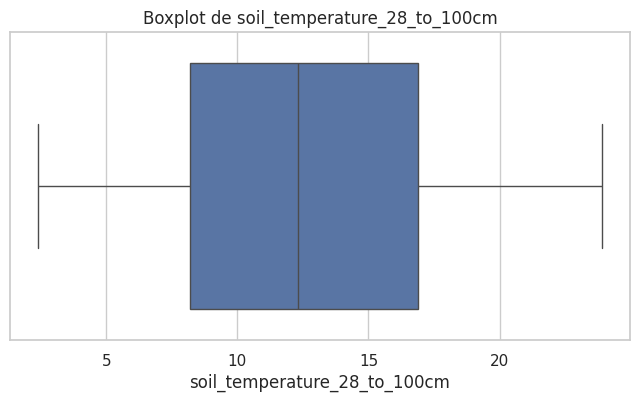

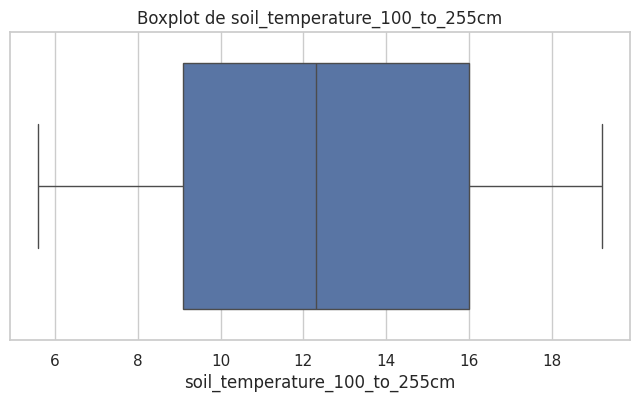

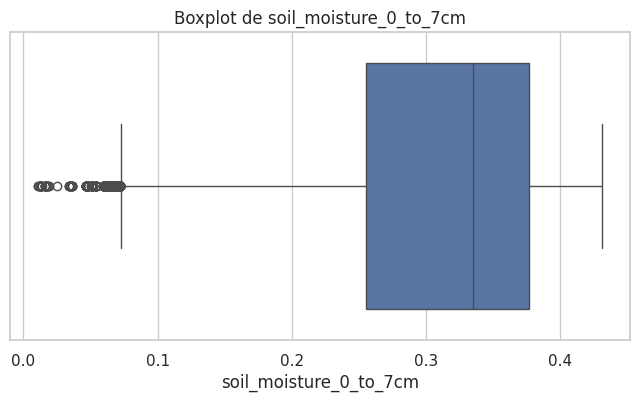

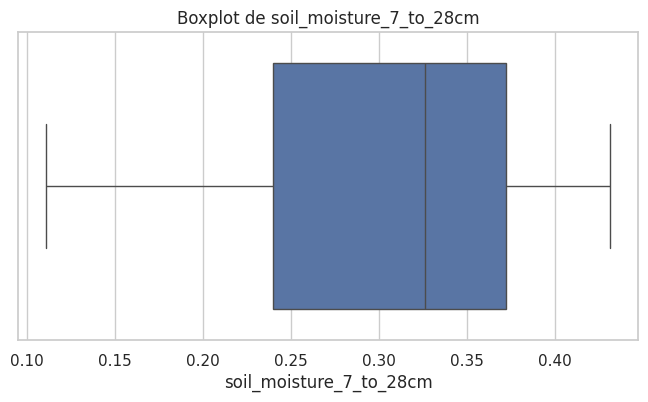

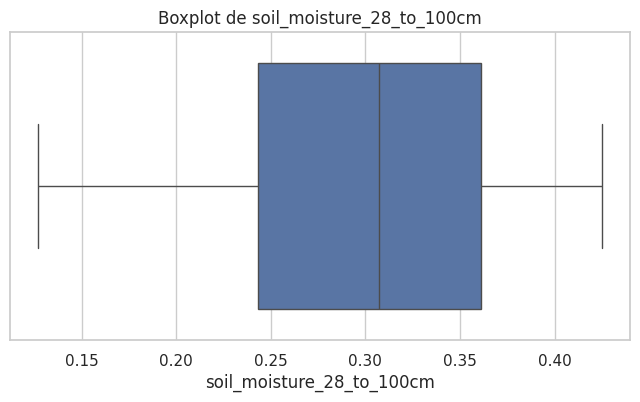

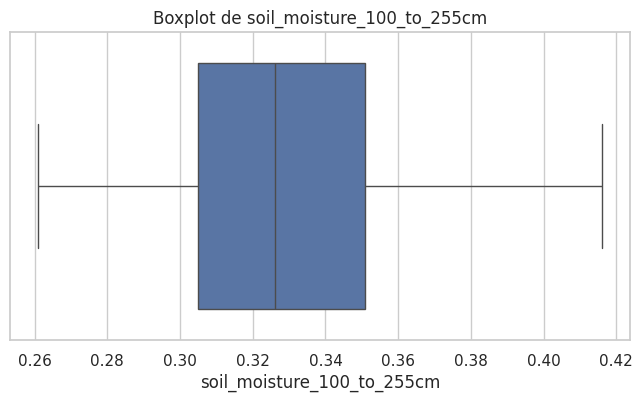

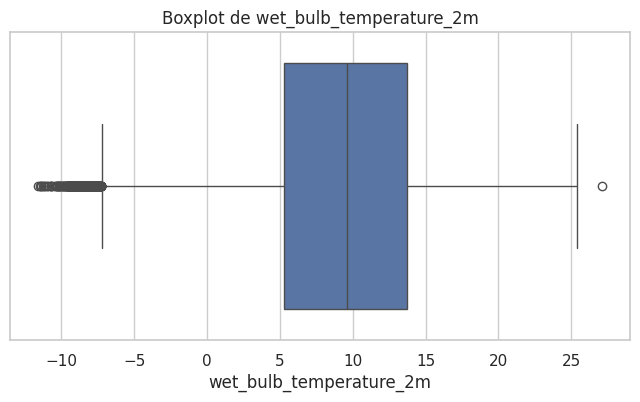

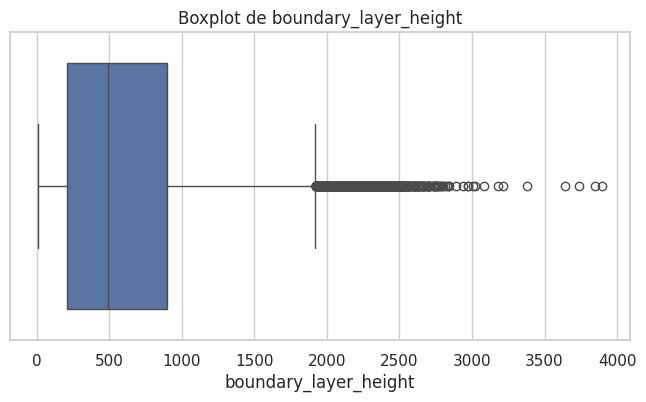

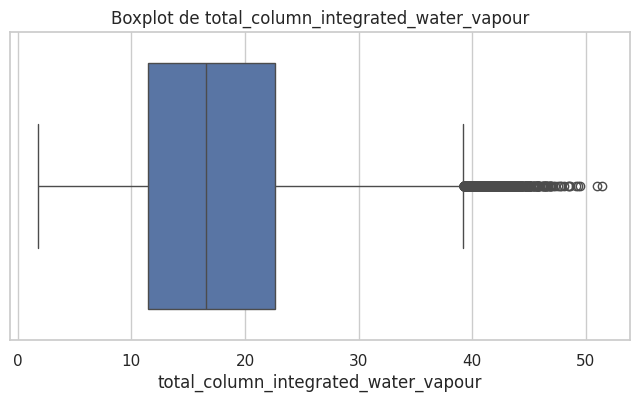

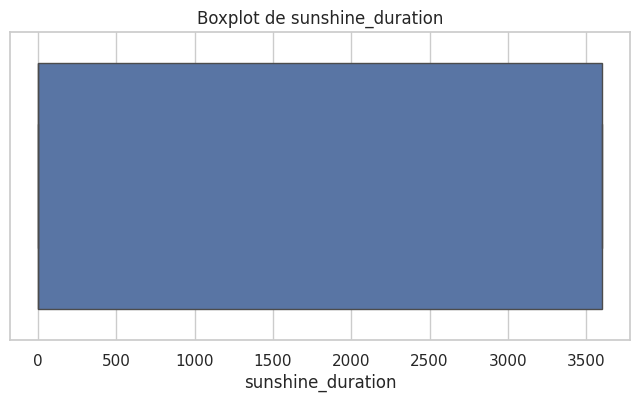


=== Corrélation des variables numériques continues avec temperature_2m ===


temperature_2m                          1.000000
apparent_temperature                    0.988635
soil_temperature_0_to_7cm               0.977001
wet_bulb_temperature_2m                 0.964210
soil_temperature_7_to_28cm              0.887182
dew_point_2m                            0.849685
soil_temperature_28_to_100cm            0.781438
vapour_pressure_deficit                 0.771244
total_column_integrated_water_vapour    0.728010
et0_fao_evapotranspiration              0.639196
sunshine_duration                       0.421886
soil_temperature_100_to_255cm           0.410383
boundary_layer_height                   0.379364
wind_gusts_10m                          0.078993
cloud_cover_high                        0.048505
wind_direction_100m                     0.041535
wind_direction_10m                      0.038632
rain                                    0.031753
precipitation                           0.023292
cloud_cover_mid                         0.007062
soil_moisture_100_to

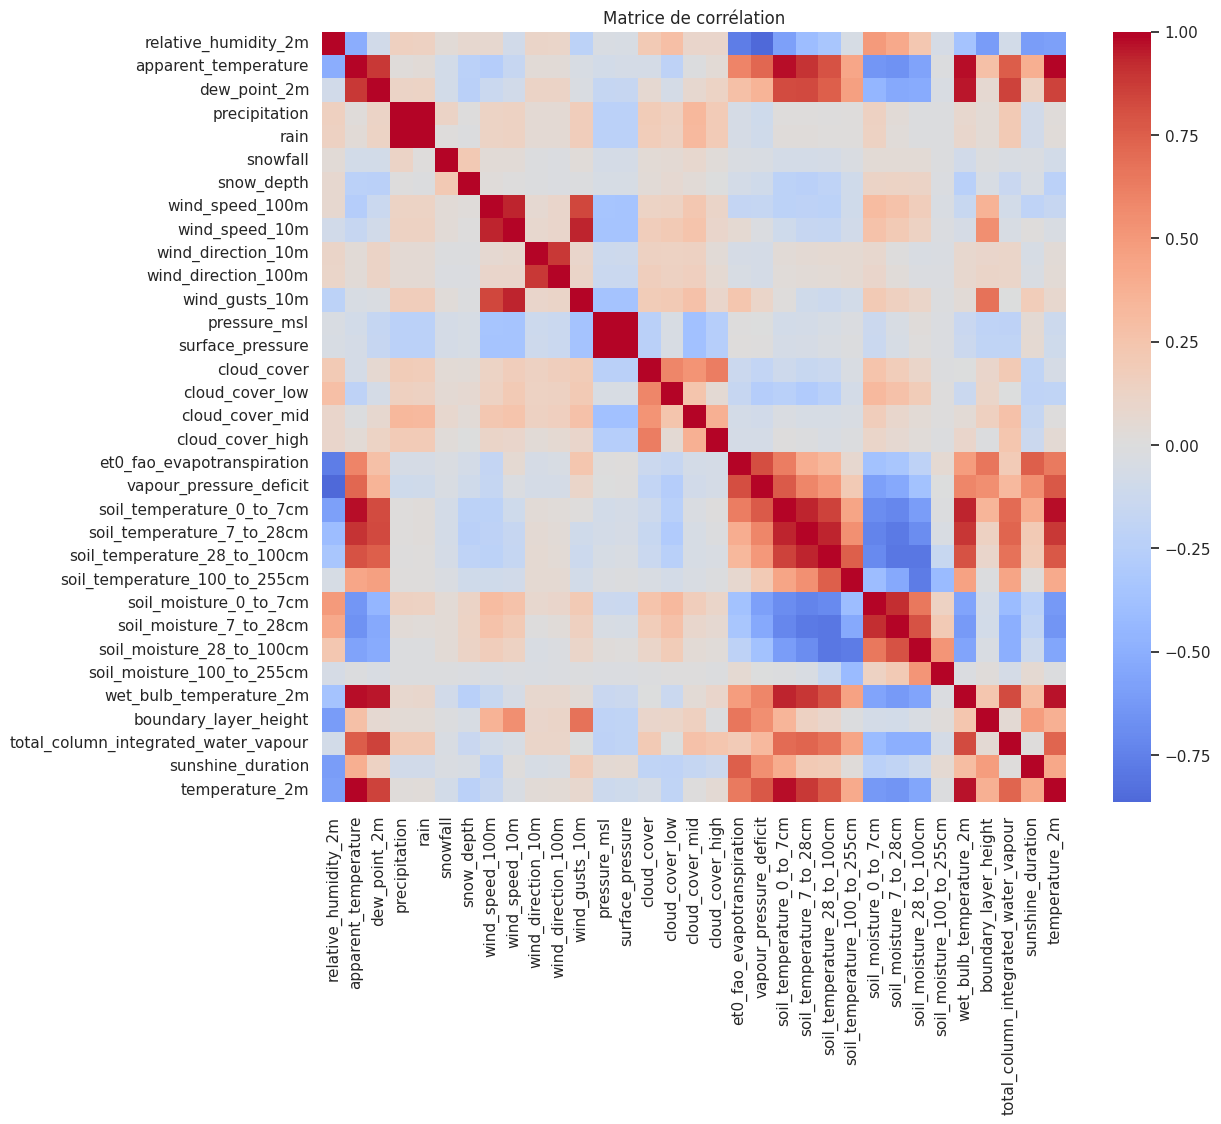

In [18]:
# === 4. Boxplots pour détecter les valeurs aberrantes ===
for c in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot de {c}")
    plt.show()

# === 5. Corrélation avec la cible temperature_2m ===
corr_matrix = df[num_cols + ['temperature_2m']].corr()
corr_with_target = corr_matrix['temperature_2m'].sort_values(ascending=False)
print("\n=== Corrélation des variables numériques continues avec temperature_2m ===")
display(corr_with_target)

# Visualisation des corrélations via heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

# Analyse des Séries Temporelles

Cette section est dédiée à l'analyse exploratoire (EDA) de nos données en se focalisant sur les propriétés spécifiques aux séries temporelles. L'objectif est de sonder les dynamiques temporelles qui serviront de fondement indispensable pour notre future étape de modélisation.

Nous allons donc analyser et interpréter une série de graphiques et de sorties statistiques. Ces analyses sont conçues pour caractériser la structure de nos données et incluront un examen détaillé de la tendance, de la saisonnalité, de l'autocorrélation et les résultats de tests statistiques fondamentaux, notamment ceux de la stationnarité ou autre.

## 1. Vue d'ensemble de la série temporelle

Le graphique suivant représente l'évolution de la température à Paris sur une période de 25 ans, de 2000 à 2025 : 

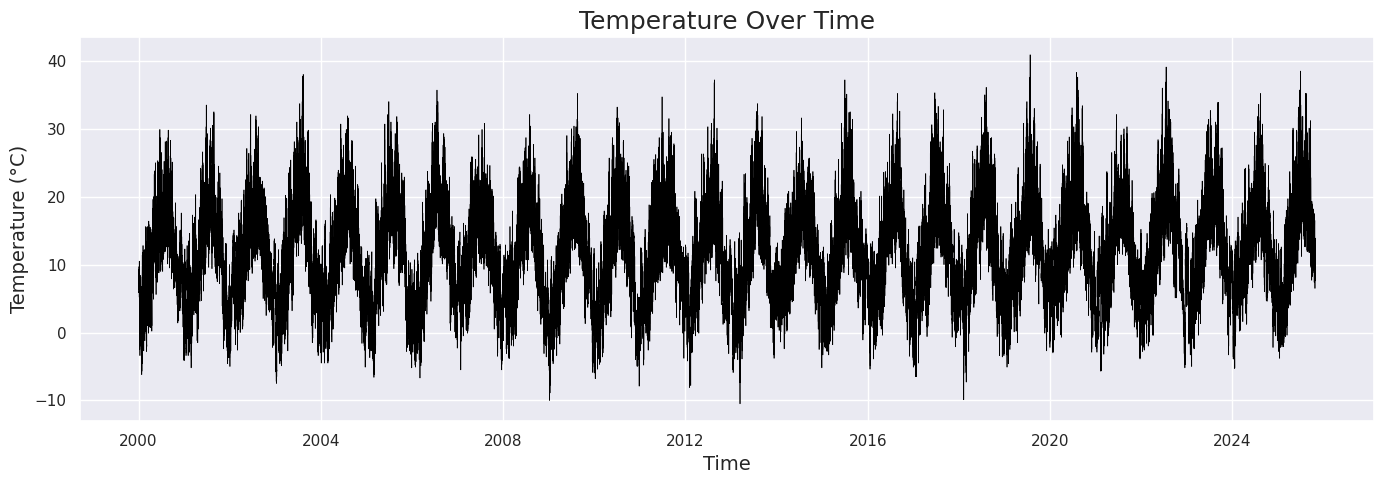

In [44]:
plt.figure(figsize=(14, 5))
sns.lineplot(
    x="time", 
    y="temperature_2m", 
    data=df,
    color="black",           
    linewidth=0.5,                         
)

plt.title("Temperature Over Time", fontsize=18)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

plt.tight_layout()
plt.show()

L'inspection visuelle révèle immédiatement une saisonnalité annuelle très prononcée et régulière, qui est la caractéristique dominante de cette série temporelle. Les températures suivent un cycle annuel systématique, avec des pics durant les mois d'été et des creux durant les mois d'hiver. Cette oscillation saisonnière est de forte amplitude et se répète avec une grande régularité sur l'ensemble des deux décennies.

En plus de ce cycle saisonnier, la série présente une forte volatilité à haute fréquence, visible par les "dents de scie" rapides de la courbe. Celles-ci représentent les fluctuations météorologiques quotidiennes, qui se superposent au schéma saisonnier de base. On note également la présence d'événements extrêmes, tels que des pics caniculaires et des vagues de froid, qui se manifestent par des dépassements notables de l'amplitude saisonnière moyenne.

Concernant la tendance à long terme (par exemple, un réchauffement ou un refroidissement sur 25 ans), elle n'est pas visuellement évidente à ce stade. Elle est potentiellement masquée par la forte variance saisonnière et la volatilité à court terme.

Ce premier graphique temporel confirme la nature cyclique et volatile des données. Une analyse plus détaillée et une décomposition formelle de la série en ses différentes composantes – tendance, saisonnalité et résidus – seront effectuées dans la suite de ce notebook pour quantifier ces observations.

## 2. Analyse des profils saisonniers

Le graphique suivant, de type "profil saisonnier", superpose les courbes de température moyenne mensuelle pour différentes années :

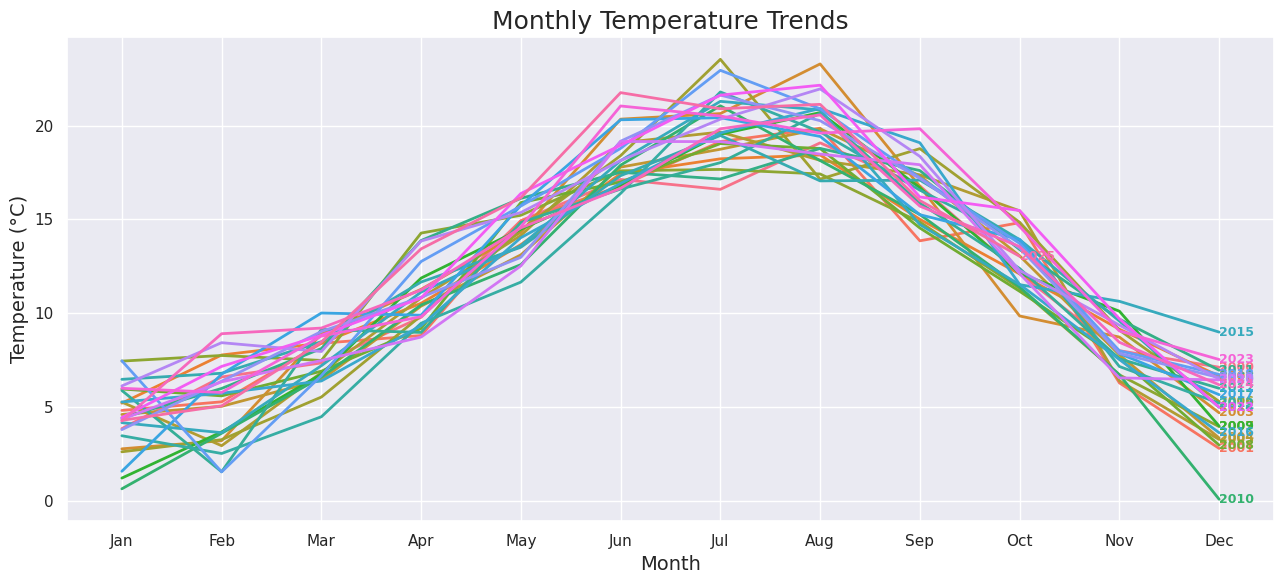

In [22]:
# Extract year and month from the index
df['year'] = df.index.year
df['month'] = df.index.month
df['month_name'] = df['month'].apply(lambda x: month_abbr[x])

# Compute monthly averages per year
monthly = (
    df.groupby(['year', 'month_name'], sort=False)['temperature_2m']
      .mean()
      .reset_index()
)

# Ensure month order (Jan → Dec)
month_order = list(month_abbr)[1:]  # ['Jan', 'Feb', ..., 'Dec']
monthly['month_name'] = pd.Categorical(monthly['month_name'], categories=month_order, ordered=True)


sns.set_theme(style="darkgrid")
plt.figure(figsize=(13, 6))

palette = sns.color_palette("husl", n_colors=monthly['year'].nunique())

# Plot the seasonal lines
sns.lineplot(
    data=monthly,
    x='month_name', y='temperature_2m', hue='year',
    palette=palette, linewidth=2
)


for i, (year, subset) in enumerate(monthly.groupby('year')):
    plt.text(
        x=subset['month_name'].iloc[-1],
        y=subset['temperature_2m'].iloc[-1],
        s=str(year),
        color=palette[i],
        fontsize=9,
        fontweight='bold',
        va='center'
    )

plt.title("Monthly Temperature Trends", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

Ce graphique offre une vue plus détaillée de la saisonnalité observée précédemment. Il confirme de manière éclatante le cycle saisonnier annuel comme étant le moteur principal des températures. Toutes les années, sans exception, suivent le même schéma : une augmentation de la température du début d'année jusqu'à un pic estival (situé en juillet ou août), suivie d'une diminution jusqu'en décembre.

L'apport principal de ce visuel est de mettre en évidence la variabilité interannuelle. Si le profil saisonnier est constant, son intensité varie considérablement d'une année à l'autre. On observe un "faisceau" de courbes, montrant que :

    1. La variabilité des pics estivaux est forte : Certains étés sont notablement plus chauds (courbes du haut, dépassant 22°C en moyenne mensuelle), tandis que d'autres sont plus frais (courbes du bas, peinant à atteindre 17°C).

    2. La variabilité hivernale est également présente : Les mois de janvier et février montrent un écart de plusieurs degrés entre les hivers les plus froids (proches de 0°C) et les plus doux (autour de 7°C).

    3. Les mois de transition (printemps et automne) voient les courbes se croiser fréquemment, illustrant des différences dans la rapidité de l'installation ou de la fin des saisons.

En synthèse, ce graphique décompose la volatilité totale observée dans le premier graphique. Il sépare le schéma saisonnier commun de la variation interannuelle. Il sera donc crucial pour l'analyse de quantifier cette variance interannuelle et de comprendre si elle est purement aléatoire ou si elle est liée à d'autres facteurs ou cycles de plus long terme.

## 3. Évolution interannuelle par mois

Le graphique en panneaux suivant décompose l'analyse saisonnière en présentant douze mini-graphiques, un pour chaque mois de l'année. Chaque panneau individuel montre l'évolution de la température moyenne pour un mois spécifique.

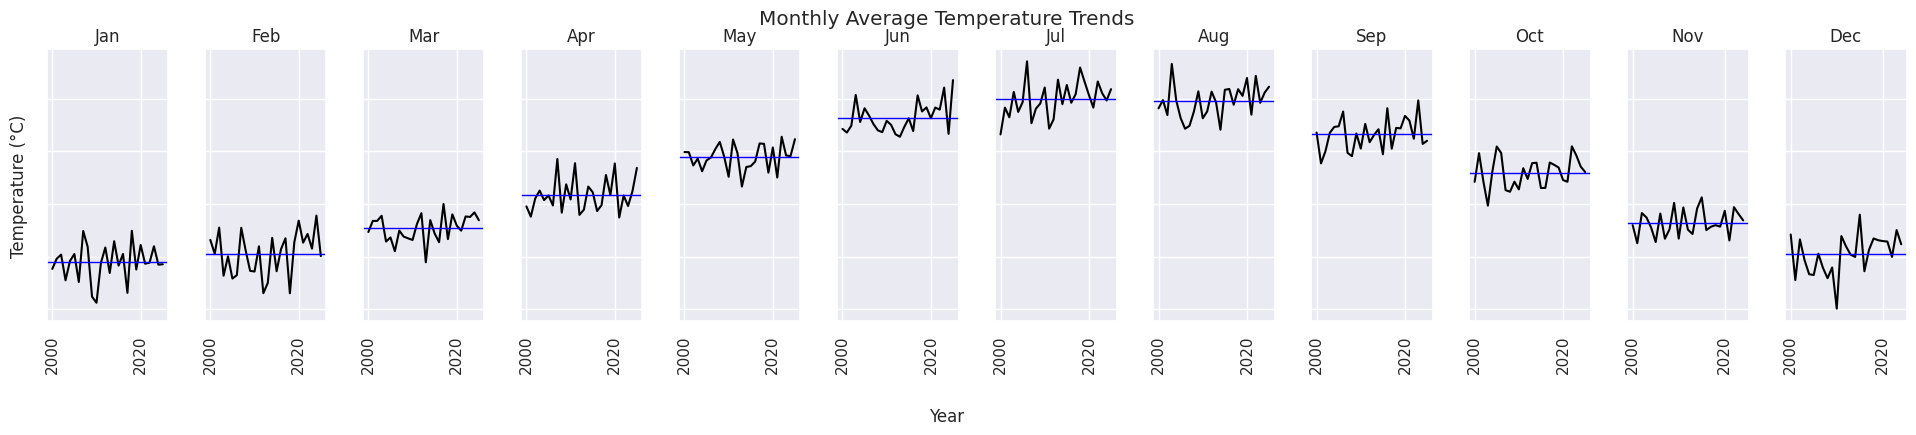

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(24, 4), sharey=True)

for i, month in enumerate(month_order):
    month_data = monthly[monthly['month_name'] == month]
    if month_data.empty:
        axes[i].set_visible(False)
        continue

    mean_temp = month_data['temperature_2m'].mean()

    # Plot temperature per year for this month
    axes[i].plot(month_data['year'], month_data['temperature_2m'], color='black')
    # Plot average line
    axes[i].axhline(mean_temp, color='blue', linestyle='-', linewidth=1, label='Average')

    axes[i].set_title(month)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=90)

    if i == 0:
        axes[i].set_ylabel('Temperature (°C)')
    else:
        axes[i].set_yticklabels([])

fig.suptitle('Monthly Average Temperature Trends')
fig.text(0.5, -0.05, 'Year', ha='center')
fig.subplots_adjust(wspace=0.3, bottom=0.2)

plt.show()

L'objectif de cette visualisation était d'isoler la variabilité interannuelle et de rechercher une tendance de fond, en supprimant l'effet du cycle saisonnier principal.

L'observation la plus notable est l'absence d'une tendance linéaire claire et uniforme. Dans la plupart des panneaux, la température moyenne du mois oscille de manière significative autour de la moyenne à long terme sans montrer d'augmentation ou de diminution systématique.

Ce qui est mis en évidence est l'importante variabilité interannuelle. Pour n'importe quel mois donné (par exemple, juillet), certaines années sont nettement plus chaudes que la moyenne de juillet, tandis que d'autres sont nettement plus fraîches. Cette visualisation confirme que la "dispersion" observée dans le graphique précédent (le faisceau de courbes) n'est pas un bruit aléatoire uniforme, mais une fluctuation annuelle significative. Cela suggère la présence de cycles ou de variations de plus basse fréquence (pluriannuels) qui influencent les températures, en plus du cycle saisonnier annuel.

## 4. Identification du cycle diurne

Le graphique suivant superpose les profils de température de nombreuses journées individuelles où l'axe X représente le temps sur un cycle de 24 heures :

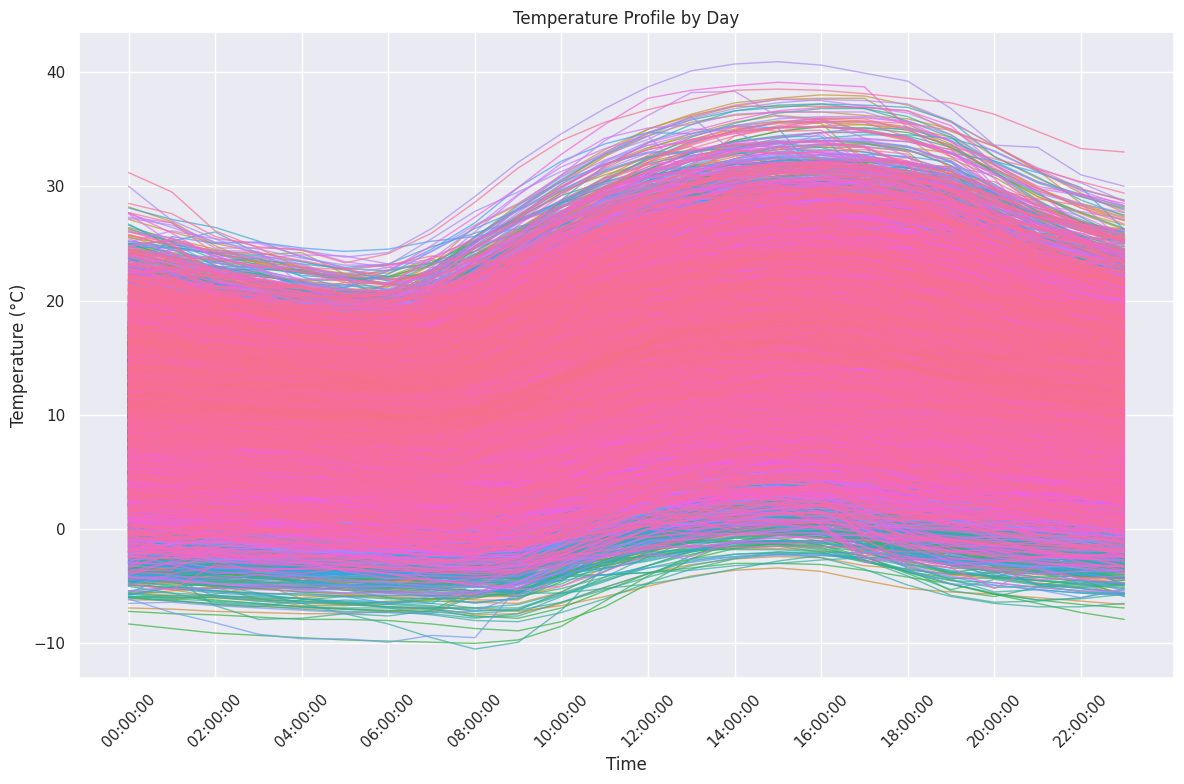

In [21]:
df["hour-minute"] = df.index.strftime("%H:%M:%S")
df["day"] = df.index.date

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(
    data=df,
    x="hour-minute",
    y="temperature_2m",
    hue="day",
    palette="husl",
    legend=False,
    ax=ax,
    linewidth=1,
    alpha=0.7
)


unique_ticks = df["hour-minute"].unique()
ticks_to_plot = unique_ticks[::2]  
ax.set_xticks(range(0, len(unique_ticks), 2))
ax.set_xticklabels(ticks_to_plot, rotation=45)

ax.set_title("Temperature Profile by Day")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (°C)")

plt.tight_layout()
plt.show()

Cette visualisation met en évidence un second cycle fondamental : le cycle diurne (journalier), qui s'ajoute au cycle annuel déjà identifié. On observe un schéma très net et répété : les températures sont au plus bas tôt le matin (généralement autour de 06h) puis augmentent avec le lever du soleil pour atteindre un pic dans l'après-midi (typiquement entre 14h et 18h), avant de redescendre durant la nuit.

L'élément le plus frappant est l'extrême dispersion verticale des courbes, allant de -10°C à plus de 40°C. Cette dispersion n'est pas aléatoire ; elle est le résultat de la superposition du cycle saisonnier sur le cycle diurne. Les lignes du bas, parfois négatives, représentent les profils des jours d'hiver, tandis que les lignes du haut, dépassant 30°C ou 40°C, correspondent aux jours d'été. Le "cœur" très dense des courbes (en rose) représente la majorité des jours de mi-saison.

En conclusion, ce graphique est essentiel car il confirme que les données de température sont régies par deux cycles imbriqués : un cycle annuel (qui fixe le niveau de température moyen du jour) et un cycle diurne (qui module cette température au fil des heures). On note également que l'amplitude de ce cycle diurne semble elle-même varier en fonction de la saison : les jours d'été (lignes hautes) montrent une "vague" journalière plus ample que les jours d'hiver (lignes basses, qui sont comparativement plus plates).